# Interpreting an image for analysis

## Importing libraries and setting my image size Eva/(edits by Pablo)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [12., 12.]

## Importing image 

In [72]:
#Store the file path to a variable for ease of use (Pablo)
fname=r'C:\Users\Pablo\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'
pic = fits.open(fname)
#original Eva def'n
#pic = fits.open(r'C:\Users\evacs\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

## Set image data into a 2-d array Eva

In [73]:
data = pic[0].data

## Print image to the screen Eva

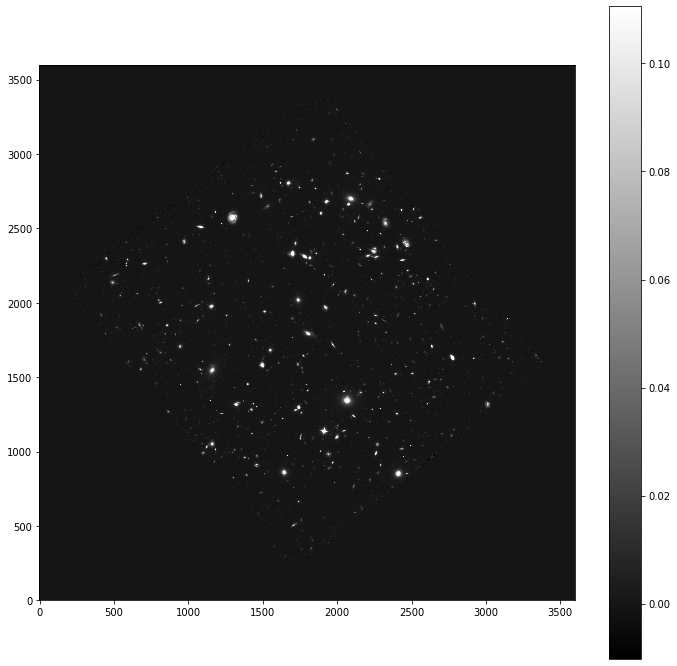

In [74]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-.2*s, vmax=m+2*s, origin='lower')
plt.colorbar();

## Measure a spatially varying background on the image Eva

In [75]:
bkg = sep.Background(data = data.byteswap().newbyteorder())

## Print mean and noise from image Eva

In [76]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


## Evaluate background as 2-d array Eva

In [77]:
bkg_image = bkg.back()

## Show only the background Eva

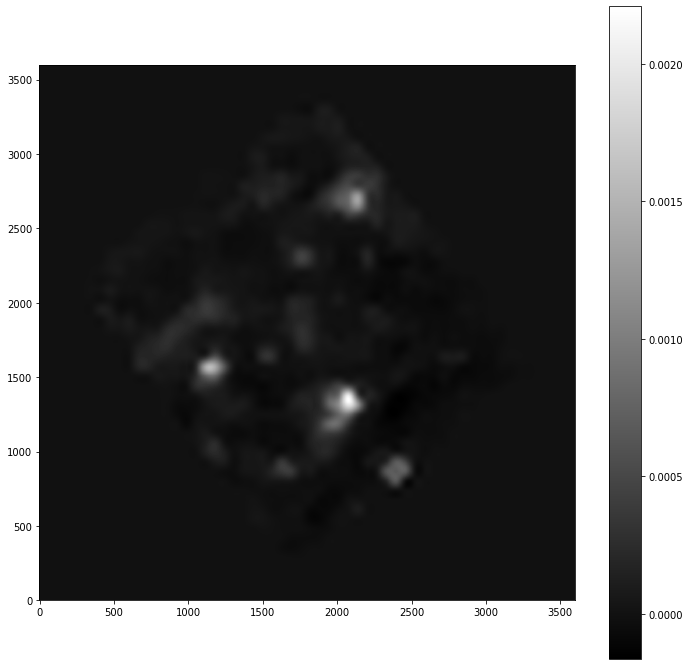

In [78]:
plt.imshow(bkg_image , interpolation='nearest' , cmap='gray' , origin='lower')
plt.colorbar()

## Evaluate background NOISE as 2-d array Eva

In [79]:
bkg_rms = bkg.rms()

## Show only the background NOISE Eva

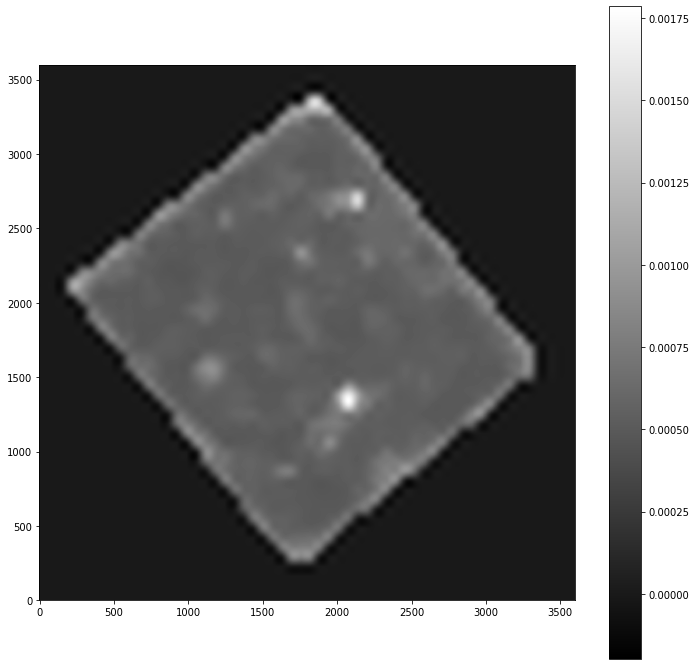

In [80]:
plt.imshow(bkg_rms , interpolation='nearest' , cmap='gray' , origin='lower')
plt.colorbar()

## Subtract the background noise from the image Eva

In [81]:
data_sub = data - bkg

## Detect objects in image (total number of flux output) Eva

In [82]:
objects = sep.extract(data_sub, 6, err=bkg.globalrms)
len(objects)

2253

## Show detected objects indicated with purple ellipses Eva

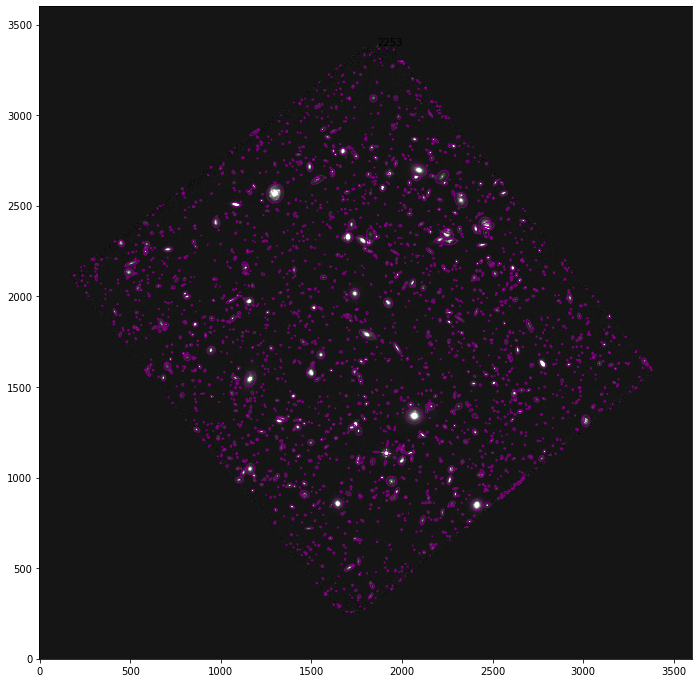

In [83]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-.2*s, vmax=m+2*s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('purple')
    ax.add_artist(e)
#Just to graffically show the total number of fluxes len(object) starts at pos 0 thus the final number will be i+1 to plot
#Pablo
plt.annotate(i+1 , xy=[objects['x'][i] , objects['y'][i]])
plt.savefig('complete.png' , bbox_inches='tight' , dpi=300)

# Store the flux values from performing Circular aperture photometry (Pablo)

In [84]:
flux, fluxerr, flag = sep.sum_circle(data_sub , objects['x'] , objects['y'] , 3.0 , err=bkg.globalrms , gain=1.0)

# Show the objects as in tutorial (Pablo)

In [85]:
for i in range(len(objects)):
    xarray.append(i)
    yarray.append(flux[i])
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
        # For each i, print the flux and error.

object 0: flux = 0.077779 +/- 0.278904
object 1: flux = 0.063383 +/- 0.251777
object 2: flux = 0.104682 +/- 0.323559
object 3: flux = 0.068500 +/- 0.261740
object 4: flux = 0.069188 +/- 0.263051
object 5: flux = 0.142099 +/- 0.376971
object 6: flux = 0.047123 +/- 0.217097
object 7: flux = 0.138466 +/- 0.372121
object 8: flux = 1.152321 +/- 1.073466
object 9: flux = 0.148642 +/- 0.385552
object 10: flux = 0.048234 +/- 0.219641
object 11: flux = 0.062022 +/- 0.249059
object 12: flux = 0.108760 +/- 0.329801
object 13: flux = 0.067883 +/- 0.260559
object 14: flux = 0.084847 +/- 0.291300
object 15: flux = 0.551257 +/- 0.742472
object 16: flux = 0.071368 +/- 0.267163
object 17: flux = 1.121409 +/- 1.058970
object 18: flux = 0.829761 +/- 0.910917
object 19: flux = 0.111686 +/- 0.334207
object 20: flux = 0.108356 +/- 0.329187
object 21: flux = 0.111807 +/- 0.334387
object 22: flux = 0.287389 +/- 0.536095
object 23: flux = 0.153096 +/- 0.391285
object 24: flux = 0.126437 +/- 0.355592
object 25:

# Histogram of the Fluxes (Pablo)

<class 'numpy.ndarray'>
(3600, 3600)
74.44648


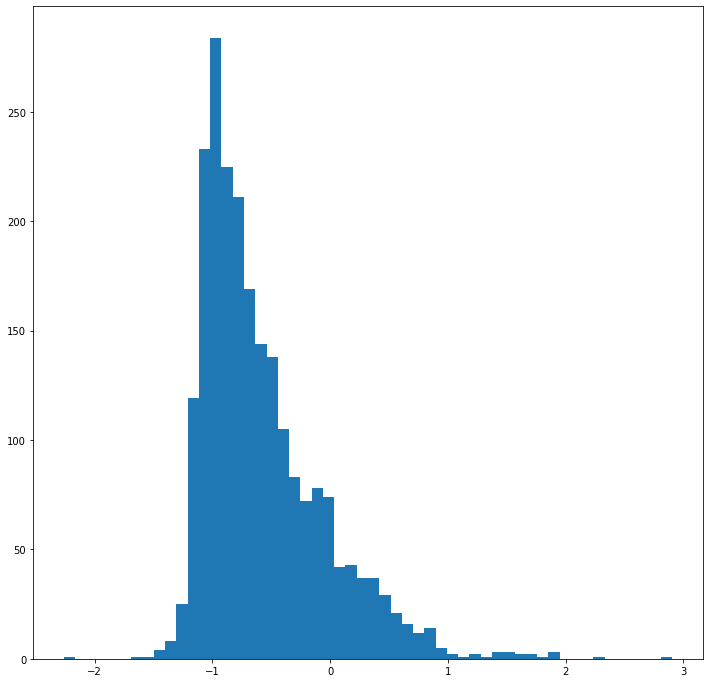

In [86]:
# Next two lines were just for troubleshoot purposes
pic=fits.open(fname)
data = pic[0].data

pic.close()
data=fits.getdata(fname)

print(type(data))
print(data.shape)
print(np.max(data))
#For the histogram range the values need to be placed in a log base 10 scale to efficiently display the chart
#call from that flux definition
histogram=plt.hist(np.log10(flux[flux>0]),bins='auto')